# Regularization (l1 and l2)

In [21]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.regularizers import l1,l2
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

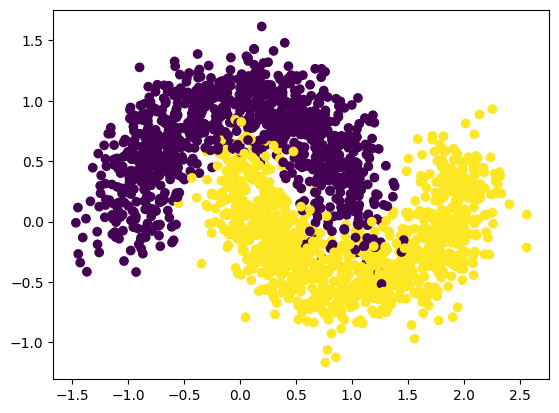

In [22]:
x,y=make_moons(2000,noise=0.2,random_state=2)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

## Model1 with l1 regularization

In [23]:
model1=Sequential()
model1.add(Dense(32,input_dim=2,activation='relu',kernel_regularizer=l1(0.0001)))
model1.add(Dense(16,activation='relu',kernel_regularizer=l1(0.0001)))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                96        
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [24]:
adam=Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history1=model1.fit(x,y,epochs=20,validation_split=0.2,)

Epoch 1/20
50/50 [==============================] - 1s 11ms/step - loss: 0.3564 - accuracy: 0.8556 - val_loss: 0.3047 - val_accuracy: 0.8625
Epoch 2/20
50/50 [==============================] - 0s 7ms/step - loss: 0.2653 - accuracy: 0.8913 - val_loss: 0.2576 - val_accuracy: 0.9025
Epoch 3/20
50/50 [==============================] - 0s 7ms/step - loss: 0.1849 - accuracy: 0.9312 - val_loss: 0.1640 - val_accuracy: 0.9500
Epoch 4/20
50/50 [==============================] - 0s 8ms/step - loss: 0.1381 - accuracy: 0.9506 - val_loss: 0.1438 - val_accuracy: 0.9575
Epoch 5/20
50/50 [==============================] - 0s 9ms/step - loss: 0.1216 - accuracy: 0.9606 - val_loss: 0.1575 - val_accuracy: 0.9500
Epoch 6/20
50/50 [==============================] - 0s 9ms/step - loss: 0.1170 - accuracy: 0.9600 - val_loss: 0.1295 - val_accuracy: 0.9500
Epoch 7/20
50/50 [==============================] - 0s 8ms/step - loss: 0.1168 - accuracy: 0.9619 - val_loss: 0.1398 - val_accuracy: 0.9600
Epoch 8/20
50/50 [=

9600/9600 [==============================] - 22s 2ms/step


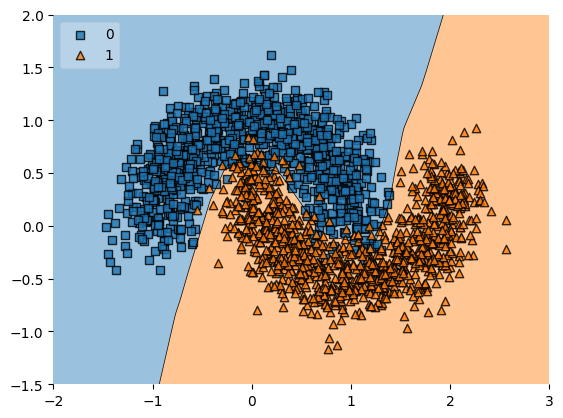

In [25]:
plot_decision_regions(x,y.astype('int'),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

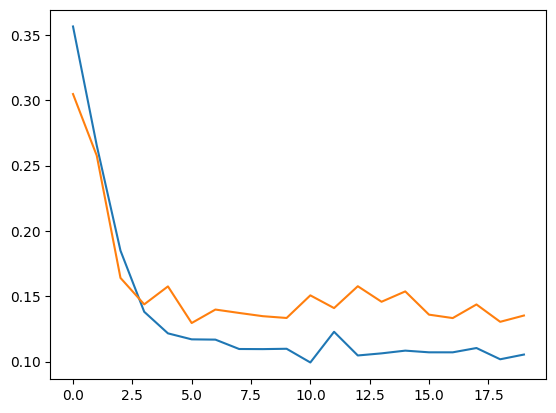

In [26]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

## Model2 with l2 regularization

In [27]:
model2=Sequential()
model2.add(Dense(32,input_dim=2,activation='relu',kernel_regularizer=l2(0.0001)))
model2.add(Dense(16,activation='relu',kernel_regularizer=l2(0.0001)))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                96        
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.optimizers import Adam
adam=Adam(learning_rate=0.01)
model2.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
history2=model2.fit(x,y,epochs=20,validation_split=0.2)

Epoch 1/20
50/50 [==============================] - 1s 8ms/step - loss: 0.3548 - accuracy: 0.8487 - val_loss: 0.2916 - val_accuracy: 0.8725
Epoch 2/20
50/50 [==============================] - 0s 5ms/step - loss: 0.2485 - accuracy: 0.8994 - val_loss: 0.2364 - val_accuracy: 0.8975
Epoch 3/20
50/50 [==============================] - 0s 5ms/step - loss: 0.1856 - accuracy: 0.9306 - val_loss: 0.1564 - val_accuracy: 0.9500
Epoch 4/20
50/50 [==============================] - 0s 5ms/step - loss: 0.1249 - accuracy: 0.9563 - val_loss: 0.1569 - val_accuracy: 0.9425
Epoch 5/20
50/50 [==============================] - 0s 6ms/step - loss: 0.1133 - accuracy: 0.9619 - val_loss: 0.1260 - val_accuracy: 0.9475
Epoch 6/20
50/50 [==============================] - 0s 6ms/step - loss: 0.1206 - accuracy: 0.9594 - val_loss: 0.1481 - val_accuracy: 0.9525
Epoch 7/20
50/50 [==============================] - 0s 6ms/step - loss: 0.1031 - accuracy: 0.9644 - val_loss: 0.1274 - val_accuracy: 0.9575
Epoch 8/20
50/50 [==

9600/9600 [==============================] - 23s 2ms/step


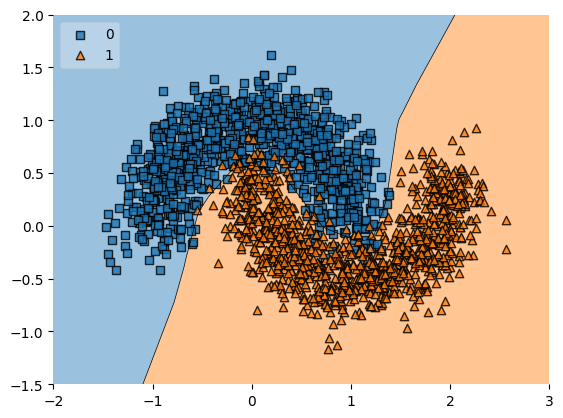

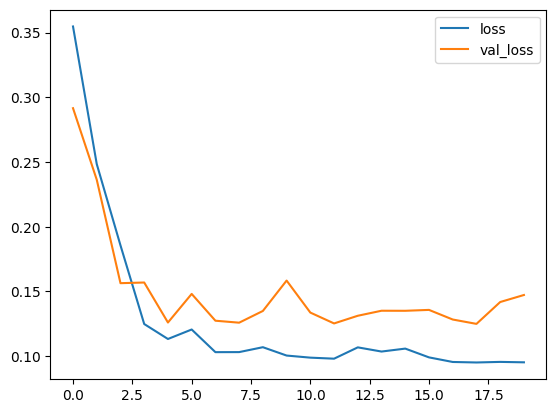

In [29]:
plot_decision_regions(x,y.astype('int'),clf=model2,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['loss','val_loss'])

## Accuracy

In [30]:
acc_model1=history1.history['accuracy'][-1]*100
acc_model2=history2.history['accuracy'][-1]*100
print(f"Accuracy of model1(l1) : {acc_model1}")
print(f"Accuracy of model2(l2) : {acc_model2}")

Accuracy of model1(l1) : 96.43750190734863
Accuracy of model2(l2) : 96.74999713897705
